<a href="https://colab.research.google.com/github/borashin0859/study/blob/master/pitch_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import numpy as np
import pandas as pd

y16,sr16=librosa.load("B001-B00013.wav",sr=48000)
#y8,sr8=librosa.load("2B001-B00013.wav",sr=48000)
#y_,sr_=librosa.load("8_B001-B00013.wav",sr=48000)
#sampling 된 음성 data 확인
print(y16.shape, sr16) 
#print(y8.shape, sr8)

(229256,) 48000


**n_fft**:int > 0 [scalar]
length of the windowed signal after padding with zeros. **The number of rows in the STFT matrix D is (1 + n_fft/2). **The default value, n_fft=2048 samples, corresponds to a physical duration of 93 milliseconds at a sample rate of 22050 Hz, i.e. the default sample rate in librosa. This value is well adapted for music signals. However, in speech processing, the recommended value is 512, corresponding to 23 milliseconds at a sample rate of 22050 Hz. In any case, we recommend setting n_fft to a power of two for optimizing the speed of the fast Fourier transform (FFT) algorithm.



**hop_length**:int > 0 [scalar]
number of audio samples between adjacent STFT columns.

Smaller values increase the number of columns in D without affecting the frequency resolution of the STFT.

If unspecified, defaults to win_length / 4 (see below).

In [0]:

def check(y,sr):
    nfft=(int(round(sr*0.025)))
    hopsize=(int(round(sr*0.010)))
    print("n_fft : ",nfft)
    print("hop_size : ",hopsize)
    S=librosa.core.stft(y,n_fft=nfft,hop_length=hopsize)
    print("Stft output shape: ", S.shape)
    #Sampling rate이 16000이기때문에 fmax=8000 더 작게 설정해도 된다. 
    pitches,magnitude=librosa.piptrack(y=y, sr=sr, n_fft=nfft, hop_length=hopsize,fmin=15.0, fmax=8000.0)
    print(pitches.shape)
    return 0




In [0]:

def check1(y,sr):
    nfft=(int(round(sr*0.040)))
    hopsize=(int(round(sr*0.010)))
    print("n_fft : ",nfft)
    print("hop_size : ",hopsize)
    S=librosa.core.stft(y,n_fft=nfft,hop_length=hopsize)
    print("Stft output shape: ", S.shape)
    #Sampling rate이 16000이기때문에 fmax=8000 더 작게 설정해도 된다. 
    pitches,magnitude=librosa.piptrack(y=y, sr=sr, n_fft=nfft, hop_length=hopsize,fmin=15.0, fmax=8000.0)
    print(pitches.shape)
    return 0




In [0]:
print(y16.shape, sr16) 
print(y8.shape, sr8)
print("------------------")
check(y16,sr16)
print("------------------")
check(y8,sr8)

(229256,) 48000
(229256,) 48000
------------------
n_fft :  1200
hop_size :  480
Stft output shape:  (601, 478)
(601, 478)
------------------
n_fft :  1200
hop_size :  480
Stft output shape:  (601, 478)
(601, 478)


0

In [0]:
print(y16.shape, sr16) 
print(y8.shape, sr8)
print("------------------")
check1(y16,sr16)
print("------------------")
check1(y8,sr8)

(76419,) 16000
(38210,) 8000
------------------
n_fft :  640
hop_size :  160
Stft output shape:  (321, 478)
(321, 478)
------------------
n_fft :  320
hop_size :  80
Stft output shape:  (161, 478)
(161, 478)


0

In [2]:
y1,sr1=librosa.load("8+B001-B00013.wav",sr=48000)
nfft=(int(round(sr1*0.040)))
print(nfft)
hopsize=(int(round(sr1*0.010)))
print(hopsize)
S=librosa.core.stft(y1,n_fft=nfft,hop_length=hopsize)
pitches,magnitude=librosa.piptrack(y=y1,sr=sr1,n_fft=nfft,hop_length=hopsize,threshold=0,fmin=0, fmax=8000.0)

1920
480


Text(0.5, 1.0, 'linear frequency power spectrogram')

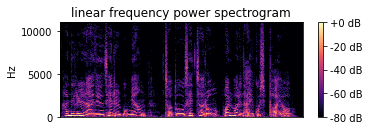

In [3]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(12,8))
d=librosa.amplitude_to_db(np.abs(S),ref=np.max)
plt.subplot(4,2,1)
librosa.display.specshow(d,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('linear frequency power spectrogram')

(961, 478)


Text(0.5, 1.0, 'log frequency power spectrogram')

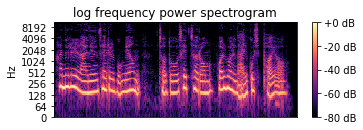

In [0]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(12,8))

d=librosa.amplitude_to_db(np.abs(S),ref=np.max)
print(d.shape)
plt.subplot(4,2,1)
librosa.display.specshow(d,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('log frequency power spectrogram')

In [4]:
print(pitches.shape)
print(S.shape)
pitches_t=pitches.transpose()
S_t=S.transpose()
print(pitches_t.shape)
print(S_t.shape)
magnitude_t=magnitude.transpose()

(961, 478)
(961, 478)
(478, 961)
(478, 961)


F0 - 기준 (magnitude가 가장 큰 값을 F0)


frame별로 나오는 F0에 대해서 mean, max, avg

In [13]:
import librosa
import numpy as np
import pandas as pd

def checkpitch(y,sr):

    nfft=(int(round(sr*0.040)))
    hopsize=(int(round(sr*0.010)))

    S=librosa.core.stft(y,n_fft=nfft,hop_length=hopsize)
    pitches,magnitude=librosa.piptrack(y=y,sr=sr,fmin=150.0,n_fft=nfft,hop_length=hopsize)
    Stft=np.transpose(S)
    pitch=np.transpose(pitches)
    mag=np.transpose(magnitude)
    maxindex=np.argmax(mag,axis=1)
    print(maxindex.shape)
    
    f0=np.zeros((len(maxindex),1),dtype=np.float64)
    
    
    for i in range(len(maxindex)):
        #print(maxindex[i])
        f0[i][0]=pitch[i][maxindex[i]]
    
    #print(f0[0:10])
    return Stft,pitch,mag,maxindex,f0

    

y16,sr16=librosa.load("B001-B00013.wav",sr=48000)
stft,pitch,mag,maxindex,f0=checkpitch(y16,sr16)
print(pitch.shape)
for i in range(f0.size):
    if(f0[i]==0):
        print(i)

# 예외! 194번째 프레임
#print(f0[194]) 
#print(pitch[194])
#print(mag[194])       
print(f0.shape)
print(np.mean(f0))
print(np.max(f0))
print(np.nanmin(np.where(f0!=0,f0,np.nan),0)[0]) #frame 안에 다 0인 frame 제외


#y2,sr2=librosa.load("B002-B00019.wav",sr=16000)
#y1,sr1=librosa.load("8+B001-B00013.wav",sr=48000)
#y8,sr8=librosa.load("2B001-B00013.wav",sr=48000)
#y2,sr2=librosa.load("1_B001-B00013.wav",sr=48000)



(478,)
(478, 961)
(478, 1)
335.00239403377515
3682.666259765625
140.4715118408203


F0 - 기준 (첫번째 peak를 F0)


frame별로 나오는 F0에 대해서 mean, max, avg

In [11]:
import librosa
import numpy as np
import pandas as pd

def checkpitch(y,sr):

    nfft=(int(round(sr*0.040)))
    hopsize=(int(round(sr*0.010)))

    S=librosa.core.stft(y,n_fft=nfft,hop_length=hopsize)
    pitches,magnitude=librosa.piptrack(y=y,sr=sr,fmin=150.0,n_fft=nfft,hop_length=hopsize)
    Stft=np.transpose(S)
    pitch=np.transpose(pitches)
    mag=np.transpose(magnitude)
    f0index=np.zeros((len(mag),1),dtype=np.int64)
    print("f0shape: ",f0index.shape)
    
    for i in range(len(mag)):
        for j in range(mag.shape[1]):
            if(mag[i][j]!=0):
                f0index[i][0]=j
                break
    print("f0shape: ",f0index.shape)
    f0=np.zeros((len(f0index),1),dtype=np.float64)
    
    
    for i in range(len(f0index)):
        #print(maxindex[i])
        f0[i][0]=pitch[i][f0index[i]]
    
    #print(f0[0:10])
    return Stft,pitch,mag,f0index,f0

    

y16,sr16=librosa.load("B001-B00013.wav",sr=48000)
stft,pitch,mag,maxindex,f0=checkpitch(y16,sr16)
print(pitch.shape)


# 예외! 194번째 프레임
#print(f0[194]) 
#print(pitch[194])
#print(mag[194])       
print(f0.shape)
print(np.mean(f0))
print(np.max(f0))
print(np.nanmin(np.where(f0!=0,f0,np.nan),0)[0]) #frame 안에 다 0인 frame 제외


#y2,sr2=librosa.load("B002-B00019.wav",sr=16000)
#y1,sr1=librosa.load("8+B001-B00013.wav",sr=48000)
#y8,sr8=librosa.load("2B001-B00013.wav",sr=48000)
#y2,sr2=librosa.load("1_B001-B00013.wav",sr=48000)




f0shape:  (478, 1)
f0shape:  (478, 1)
(478, 961)
(478, 1)
207.38902499785482
695.3858032226562
140.4715118408203


NameError: ignored

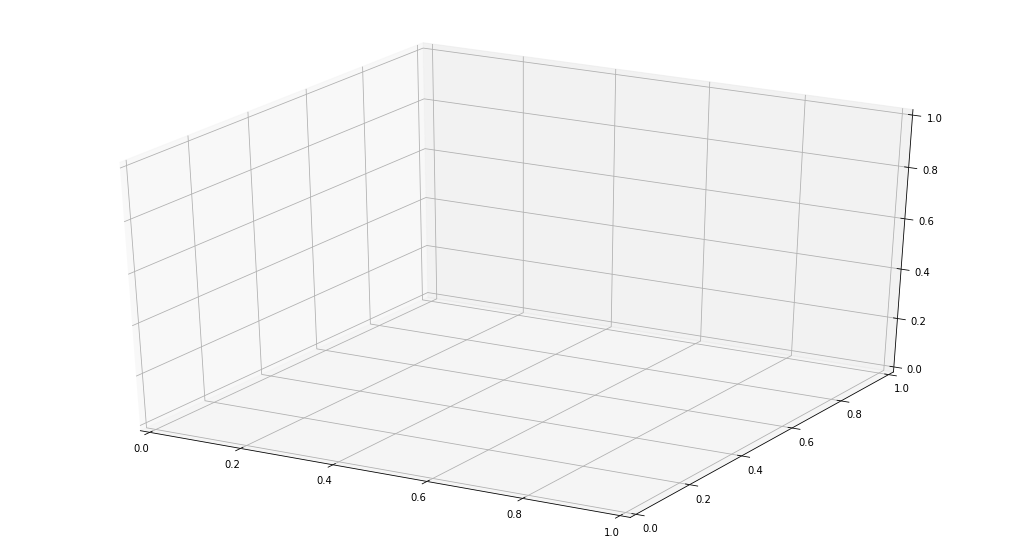

In [6]:
#3차원 Plot 해보기

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18,10))
ax=fig.gca(projection='3d')

x=np.mean(f0)
y=np.max(f0)
z=np.nanmin(np.where(f0!=0,f0,np.nan),0)[0]

ax.scatter(x,y,z,c='r', marker='o')
ax.set_xlabel('average')
ax.set_ylabel('max')
ax.set_zlabel('min')
plt.suptitle('f0 scatter',fontsize=16)
#plt.show()
#SAVE
plt.savefig('savefig_default.png')

In [8]:
j=0 #pitch에 들어있는 0이 아닌 앞 5개 peak 찍어보기
for i in range(pitch.shape[1]):
    if (pitch[70][i]!=0 and j!=5):
        print(pitch[70][i])
        j+=1

177.87149
351.07516
521.8357


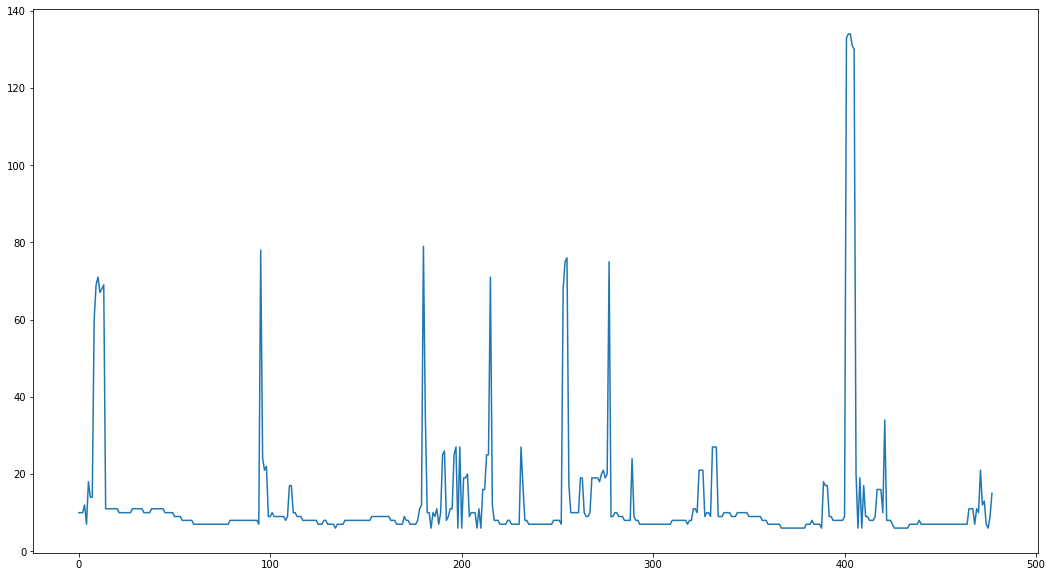

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))

plt.plot(maxindex)
plt.show()

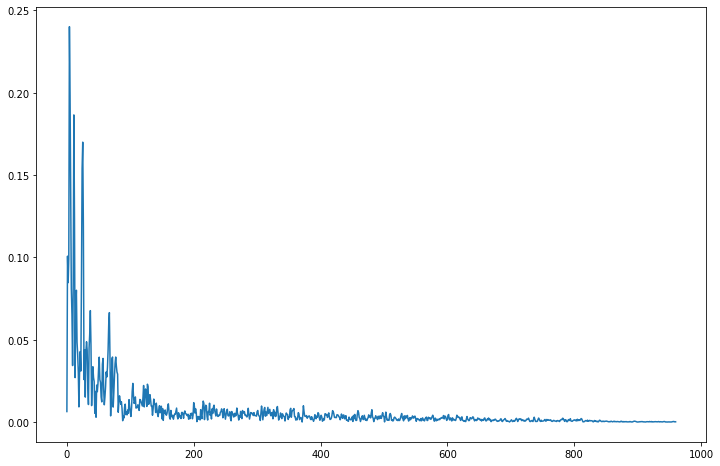

In [17]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(12,8))

plt.plot(np.abs(stft[194]))
plt.show()

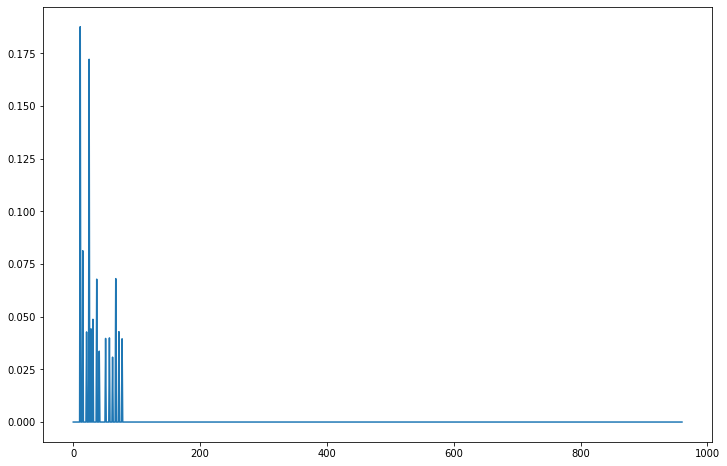

In [18]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(12,8))

plt.plot(mag[194])
plt.show()


In [21]:
j=0
for i in range(pitch.shape[1]):
    if (mag[194][i]!=0 and j!=5):
        print(pitch[194][i])
        j+=1

278.00357
368.8215
524.84125
618.5164
697.1686


Text(0.5, 1.0, 'log frequency power spectrogram')

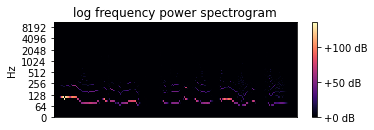

In [0]:
plt.figure(figsize=(12,8))
plt.subplot(4,2,1)
librosa.display.specshow(mag.transpose(),y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('log frequency power spectrogram')

Text(0.5, 1.0, 'log frequency power spectrogram')

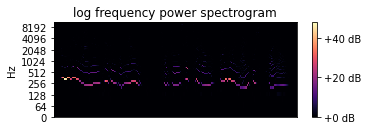

In [0]:
pitches1,magnitude1=librosa.piptrack(y=y16,sr=sr16,n_fft=nfft,hop_length=hopsize,threshold=0,fmin=0, fmax=8000.0)
plt.figure(figsize=(12,8))
plt.subplot(4,2,1)
librosa.display.specshow(magnitude1,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('log frequency power spectrogram')

Text(0.5, 1.0, 'log frequency power spectrogram')

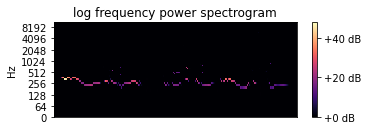

In [0]:
pitches1,magnitude1=librosa.piptrack(y=y16,sr=sr16,n_fft=nfft,hop_length=hopsize,threshold=0.8wh,fmin=0, fmax=8000.0)
plt.figure(figsize=(12,8))
plt.subplot(4,2,1)
librosa.display.specshow(magnitude1,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('log frequency power spectrogram')

In [0]:
!pip install pydub

In [0]:
from pydub import AudioSegment
y=AudioSegment.from_wav("B001-B00013.wav")
out=y.export(y,format='wav',parameters=['-af','rubberband=tempo=1.25','rubberband=pitch=1.12246'])

AttributeError: ignored

In [0]:
import librosa
y, sr = librosa.load('B001-B00013.wav', sr=16000) # y is a numpy array of the wav file, sr = sample rate
y_shifted = librosa.effects.pitch_shift(y, sr, n_steps=4) # shifted by 4 half steps

In [0]:
!pip install PySoundFile

In [0]:
import soundfile as sf
sf.write('tuning.wav',y_shifted,sr)